In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [2]:
data=pd.read_csv('지수산식회귀분석용.csv')
df=data.dropna(axis=0)
df.head(3)

,상품명,매출액,구매의사,긍정확률,환불수량
0,드민 플라워 쉬폰롱원피스,3919600,54,0.86,0.048780
1,[La belle rose]레이니 찰랑 미니 훌원피스,2443600,119,0.94,0.097561
2,[La belle rose]로제 스퀘어 미니훌원피스,2069600,107,0.88,0.096154


In [3]:
df.loc[:,'상품명'] = df.loc[:,'상품명'].astype('category').cat.codes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     363 non-null    int16  
 1   매출액     363 non-null    int64  
 2   구매의사    363 non-null    int64  
 3   긍정확률    363 non-null    float64
 4   환불수량    363 non-null    float64
dtypes: float64(2), int16(1), int64(2)
memory usage: 14.9 KB


In [4]:
scaler=MinMaxScaler()
df[:]=scaler.fit_transform(df[:])
df.head(5)

,상품명,매출액,구매의사,긍정확률,환불수량
0,0.270718,1.000000,0.453782,0.868687,0.024390
1,0.055249,0.622950,1.000000,0.949495,0.048780
2,0.069061,0.527410,0.899160,0.888889,0.048077
3,0.044199,0.334900,0.403361,0.888889,0.178571
4,0.049724,0.295049,0.218487,0.797980,0.000000


## 이제 이 dfnc데이터를 이용하여 다시 Feature Importance 수행

# Case 1

In [5]:
!pip install lightgbm

In [6]:
!pip install shap

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     363 non-null    float64
 1   매출액     363 non-null    float64
 2   구매의사    363 non-null    float64
 3   긍정확률    363 non-null    float64
 4   환불수량    363 non-null    float64
dtypes: float64(5)
memory usage: 17.0 KB


In [8]:
df['매출액'].iloc[:50]

0     1.000000
1     0.622950
2     0.527410
3     0.334900
4     0.295049
5     0.292495
6     0.261738
7     0.239871
8     0.191846
9     0.191846
10    0.176416
11    0.163107
12    0.151382
13    0.150973
14    0.149185
15    0.145404
16    0.138201
17    0.136668
18    0.136668
19    0.136668
20    0.124917
21    0.117253
22    0.102948
23    0.101926
24    0.095795
25    0.095284
26    0.094697
27    0.094365
28    0.089971
29    0.089409
30    0.088643
31    0.081490
32    0.080979
33    0.080979
34    0.078424
35    0.077913
36    0.076892
37    0.075563
38    0.075359
39    0.073826
40    0.073443
41    0.071042
42    0.066673
43    0.059648
44    0.059623
45    0.057733
46    0.057477
47    0.057375
48    0.056966
49    0.056966
Name: 매출액, dtype: float64

In [9]:
# del df['상품명']
# df.info()

In [10]:
X=df.drop('매출액',axis=1)
y=df['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((290, 4), (73, 4), (290,), (73,))

In [11]:
X_train

,상품명,구매의사,긍정확률,환불수량
63,0.113260,0.109244,0.898990,0.000000
352,0.237569,0.008403,0.222222,0.000000
255,0.433702,0.042017,1.000000,0.000000
315,0.883978,0.008403,0.989899,0.000000
78,0.842541,0.117647,0.909091,0.125000
...,...,...,...,...
323,0.569061,0.008403,0.949495,0.000000
192,0.444751,0.008403,0.626263,0.000000
117,0.723757,0.058824,1.000000,0.166667
47,0.690608,0.151261,0.717172,0.000000


In [12]:
import lightgbm as lgb  # 없을 경우 cmd/anaconda prompt에서 install
from math import sqrt
from sklearn.metrics import mean_squared_error

# lightgbm model
lgb_dtrain = lgb.Dataset(data = X_train, label = y_train) # LightGBM 모델에 맞게 변환
lgb_param = {'max_depth': 10, #10
            'learning_rate': 0.1, # Step Size
            'n_estimators': 1000, # Number of trees
            'objective': 'regression'} # 목적 함수 (L2 Loss)
lgb_model = lgb.train(params = lgb_param, train_set = lgb_dtrain) # 학습 진행
lgb_model_predict = lgb_model.predict(X_test) # test data 예측
print("RMSE: {}".format(sqrt(mean_squared_error(lgb_model_predict, y_test)))) # RMSE

C:\anaconda\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000060 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 166
[LightGBM] [Info] Number of data points in the train set: 290, number of used features: 4
[LightGBM] [Info] Start training from score 0.034844
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spl

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [13]:
import shap
explainer = shap.TreeExplainer(lgb_model) # Tree model Shap Value 확인 객체 지정
shap_values = explainer.shap_values(X_test)

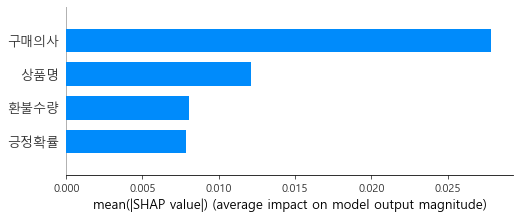

In [14]:
from matplotlib import font_manager,rc
font_path='C:\Windows\Fonts/malgun.ttf'
font=font_manager.FontProperties(fname=font_path).get_name()
rc('font',family=font)
shap.summary_plot(shap_values, X_test, plot_type = "bar")

# Case 2

In [15]:
pip install mglearn

Note: you may need to restart the kernel to use updated packages.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 362
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   상품명     363 non-null    float64
 1   매출액     363 non-null    float64
 2   구매의사    363 non-null    float64
 3   긍정확률    363 non-null    float64
 4   환불수량    363 non-null    float64
dtypes: float64(5)
memory usage: 17.0 KB


In [17]:
def scoring(x):
    if x<=0.05:
        return 1
    if x<=0.1:
        return 2
    if x<=0.2:
        return 3
    if x<=0.4:
        return 4
    else:
        return 5

In [18]:
df['매출액']=df['매출액'].apply(scoring)

In [19]:
df['매출액']

0      5
1      5
2      5
3      4
4      4
      ..
358    1
359    1
360    1
361    1
362    1
Name: 매출액, Length: 363, dtype: int64

In [20]:
# coding: utf-8
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import mglearn
import numpy as np

In [21]:
feature_columns=list(df.columns.difference(['매출액'])) # price-target, 그 외 feature
X = df[feature_columns]
y = df['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
forest = RandomForestClassifier(n_estimators=100)

In [22]:
forest.fit(X_train,y_train)

RandomForestClassifier()

In [23]:
print("훈련 세트 정확도 : {:.3f}".format(forest.score(X_train,y_train)))

print("테스트 세트 정확도 : {:.3f}".format(forest.score(X_test,y_test)))


훈련 세트 정확도 : 1.000
테스트 세트 정확도 : 0.849


In [24]:
print("특성 중요도 : \n{}".format(forest.feature_importances_))

특성 중요도 : 
[0.55909269 0.09174202 0.17474742 0.17441787]


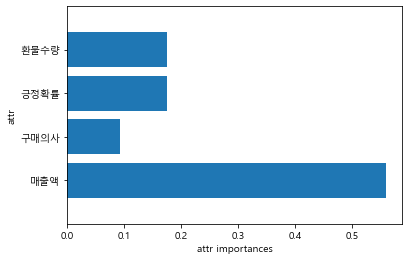

In [25]:
def plot_feature_importances_cancer(model):

    n_features = 4

    plt.barh(range(n_features), model.feature_importances_, align='center')

    plt.yticks(np.arange(n_features), df.columns[1:])

    plt.xlabel("attr importances")

    plt.ylabel("attr")

    plt.ylim(-1, n_features)

plt.show()



plot_feature_importances_cancer(forest)

# Case 3

In [26]:
!pip install xgboost

In [27]:
data=pd.read_csv('지수산식회귀분석용.csv')
data.head()

,상품명,매출액,구매의사,긍정확률,환불수량
0,드민 플라워 쉬폰롱원피스,3919600,54,0.86,0.048780
1,[La belle rose]레이니 찰랑 미니 훌원피스,2443600,119,0.94,0.097561
2,[La belle rose]로제 스퀘어 미니훌원피스,2069600,107,0.88,0.096154
3,[La belle rose]드로우 셔링 롱원피스,1316000,48,0.88,0.357143
4,[La belle rose]딘트 체크 스퀘어원피스,1160000,26,0.79,0.000000


In [28]:
df=data.dropna(axis=0)
df.head()

,상품명,매출액,구매의사,긍정확률,환불수량
0,드민 플라워 쉬폰롱원피스,3919600,54,0.86,0.048780
1,[La belle rose]레이니 찰랑 미니 훌원피스,2443600,119,0.94,0.097561
2,[La belle rose]로제 스퀘어 미니훌원피스,2069600,107,0.88,0.096154
3,[La belle rose]드로우 셔링 롱원피스,1316000,48,0.88,0.357143
4,[La belle rose]딘트 체크 스퀘어원피스,1160000,26,0.79,0.000000


In [38]:
def scoring(x):
    if x<=0.05:
        return 1
    if x<=0.1:
        return 2
    if x<=0.2:
        return 3
    if x<=0.4:
        return 4
    else:
        return 5
    
df['매출액']=df['매출액'].apply(scoring)

In [39]:
df.loc[:,'상품명'] = df.loc[:,'상품명'].astype('category').cat.codes

In [40]:
import xgboost as xgb
from xgboost import plot_importance
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')


In [41]:
X = df.drop('매출액',axis=1)
y = df['매출액']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [42]:
print(X_train.shape , X_test.shape)

(290, 4) (73, 4)


In [43]:
dtrain = xgb.DMatrix(data=X_train , label=y_train)
dtest = xgb.DMatrix(data=X_test , label=y_test)

In [57]:
num_class=3

In [58]:
params = { 'max_depth':3,
           'eta': 0.1,
           'objective':'multi:softmax',
           'eval_metric':'mlogloss',
            'n_classes':num_class
        }
num_rounds = 400

In [59]:
wlist = [(dtrain,'train'),(dtest,'eval') ]


In [60]:
xgb_model = xgb.train(params = params , dtrain=dtrain , num_boost_round=num_rounds,early_stopping_rounds=100, evals=wlist )

XGBoostError: value 0 for Parameter num_class should be greater equal to 1
num_class: Number of output class in the multi-class classification.

In [47]:
pred_probs = xgb_model.predict(dtest)
print('predict( ) 수행 결과값을 10개만 표시, 예측 확률 값으로 표시됨')
print(np.round(pred_probs[:10],3))

# 예측 확률이 0.5 보다 크면 1 , 그렇지 않으면 0 으로 예측값 결정하여 List 객체인 preds에 저장 
preds = [ 1 if x > 0.5 else 0 for x in pred_probs ]
print('예측값 10개만 표시:',preds[:10])

NameError: name 'xgb_model' is not defined

In [48]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test,pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

In [49]:
get_clf_eval(y_test , preds, pred_probs)

NameError: name 'preds' is not defined

NameError: name 'xgb_model' is not defined

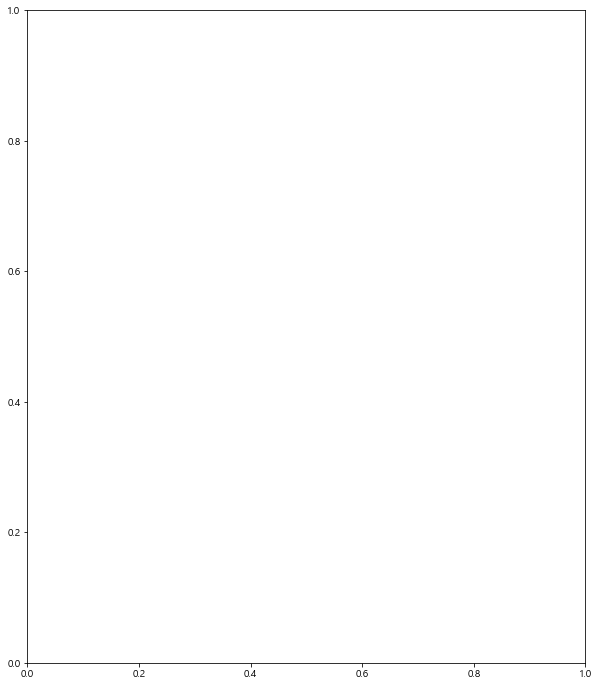

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(10, 12))
plot_importance(xgb_model, ax=ax)